In [2]:
%pip install --upgrade plotly pandas numpy seaborn matplotlib nbformat scikit-learn

You should consider upgrading via the '/Users/jnibbs/.pyenv/versions/3.10.5/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

In [5]:
stock = pd.read_csv('FUN.csv')

## Dataset on the ticker FUN 
---

In [6]:
print(stock.shape)
print(f'Any NaN: {stock.isna().any().all()}')
print(f'Any Duplicates: {stock.duplicated().any()}')
stock.info()

(8303, 7)
Any NaN: False
Any Duplicates: False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8303 entries, 0 to 8302
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8303 non-null   object 
 1   Open       8303 non-null   float64
 2   High       8303 non-null   float64
 3   Low        8303 non-null   float64
 4   Close      8303 non-null   float64
 5   Adj Close  8303 non-null   float64
 6   Volume     8303 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 454.2+ KB


In [7]:
stock['Date'] = pd.to_datetime(stock['Date'])

In [8]:
stock[:2]

,Date,Open,High,Low,Close,Adj Close,Volume
0,1987-04-23,4.88,5.00,4.88,5.00,0.22,2902200
1,1987-04-24,5.00,5.00,4.94,5.00,0.22,1401800


In [30]:
stock.sort_values('Date', ascending=False)

,Date,Open,High,Low,Close,Adj Close,Volume
8302,2020-04-01,17.73,17.96,16.66,17.05,17.05,898700
8301,2020-03-31,19.60,20.57,18.14,18.34,18.34,1027000
8300,2020-03-30,22.21,22.21,19.33,19.40,19.40,1216900
8299,2020-03-27,23.12,23.94,21.26,22.66,22.66,1167900
8298,2020-03-26,27.81,28.42,24.09,25.01,25.01,1379900
...,...,...,...,...,...,...,...
4,1987-04-29,5.00,5.00,4.94,5.00,0.22,67000
3,1987-04-28,5.00,5.00,4.94,5.00,0.22,89000
2,1987-04-27,5.00,5.00,4.88,5.00,0.22,290400
1,1987-04-24,5.00,5.00,4.94,5.00,0.22,1401800


In [40]:
newer_stuff = stock.query('Date >= "2019-04-10"')
newer_stuff[:2]

,Date,Open,High,Low,Close,Adj Close,Volume
8056,2019-04-10,52.56,53.54,52.56,53.11,49.35,138000
8057,2019-04-11,53.10,53.91,53.10,53.56,49.77,84500


### Train the model

In [32]:
target = newer_stuff['High']
features = newer_stuff.drop(['High', 'Date'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target, 
                                                    test_size=0.2, 
                                                    random_state=10)

In [33]:
regr = LinearRegression()
regr.fit(X_train, y_train)
rsquared = regr.score(X_train, y_train)
print(f'Training data r-squared: {rsquared:.2}')

Training data r-squared: 1.0


In [34]:
regr_coef = pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['Coefficient'])
regr_coef

,Coefficient
Open,0.50
Low,0.12
Close,0.35
Adj Close,0.02
Volume,0.00


In [41]:
predicted_vals = regr.predict(X_train)
residuals = (y_train - predicted_vals)

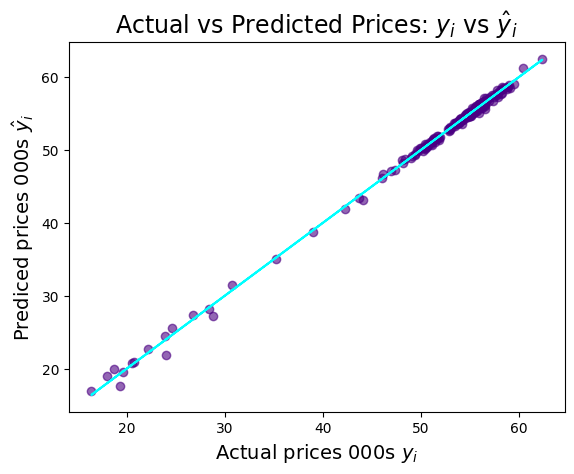

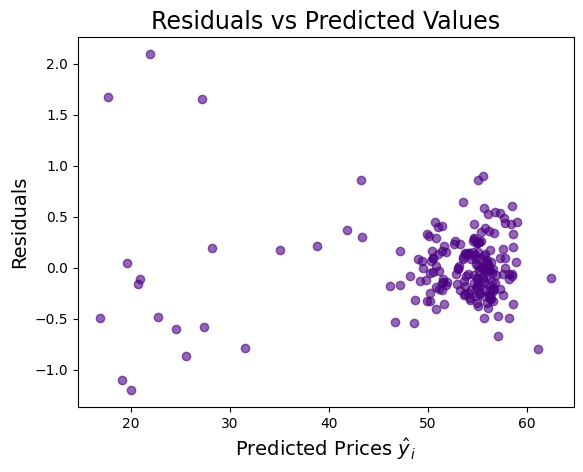

In [42]:
# Original Regression of Actual vs. Predicted Prices
plt.figure(dpi=100)
plt.scatter(x=y_train, y=predicted_vals, c='indigo', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')
plt.title(f'Actual vs Predicted Prices: $y _i$ vs $\hat y_i$', fontsize=17)
plt.xlabel('Actual prices 000s $y _i$', fontsize=14)
plt.ylabel('Prediced prices 000s $\hat y _i$', fontsize=14)
plt.show()

# Residuals vs Predicted values
plt.figure(dpi=100)
plt.scatter(x=predicted_vals, y=residuals, c='indigo', alpha=0.6)
plt.title('Residuals vs Predicted Values', fontsize=17)
plt.xlabel('Predicted Prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

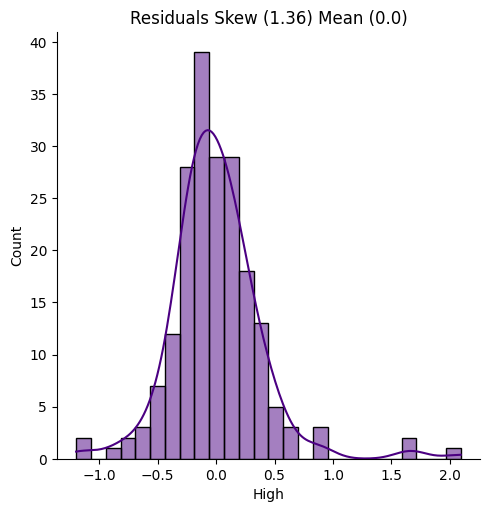

In [43]:
resid_mean = round(residuals.mean(), 2)
resid_skew = round(residuals.skew(), 2)

sns.displot(residuals, kde=True, color='indigo')
plt.title(f'Residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

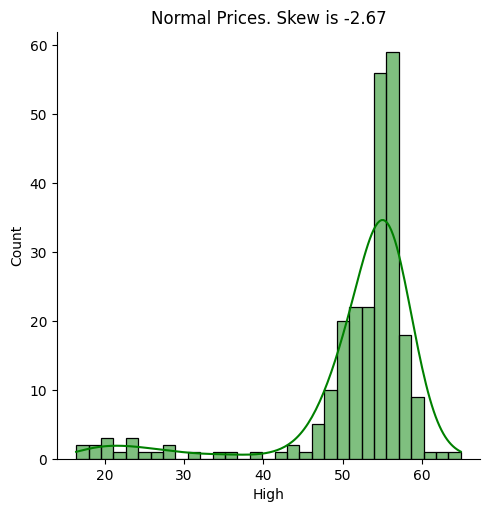

In [44]:
tgt_skew = newer_stuff['High'].skew()
sns.displot(newer_stuff['High'], kde='kde', color='green')
plt.title(f'Normal Prices. Skew is {tgt_skew:.3}')
plt.show()

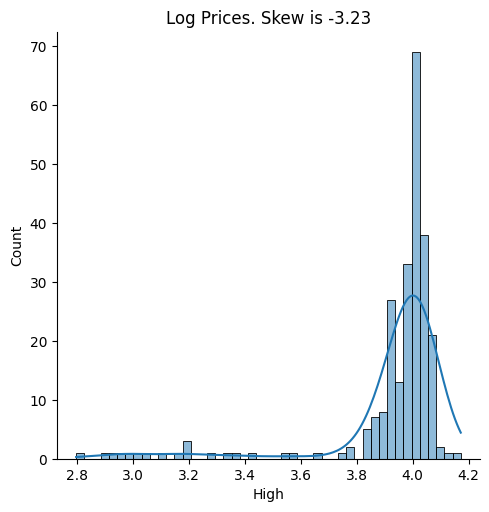

In [45]:
y_log = np.log(newer_stuff['High'])
sns.displot(y_log, kde=True)
plt.title(f'Log Prices. Skew is {y_log.skew():.3}')
plt.show()

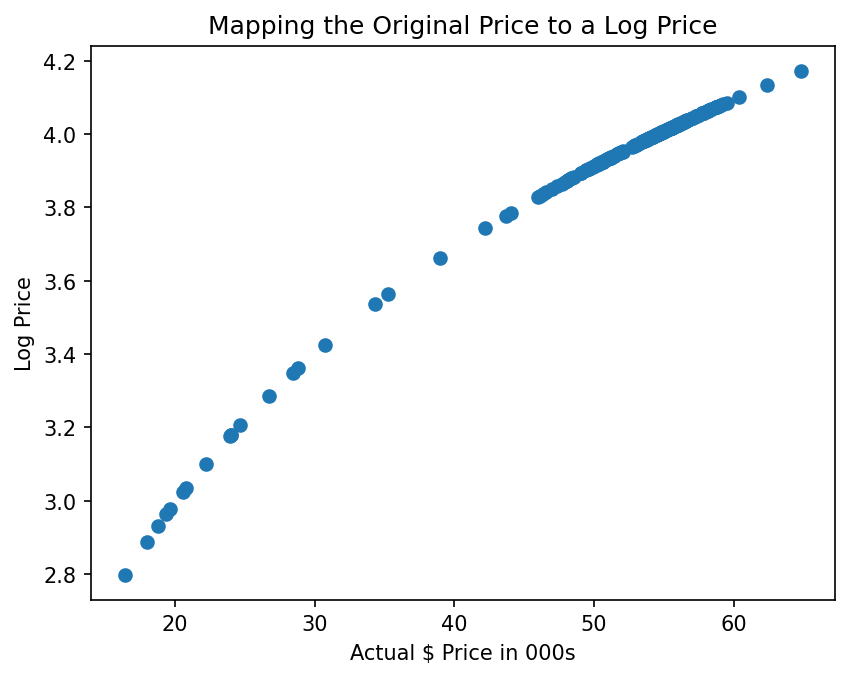

In [46]:
plt.figure(dpi=150)
plt.scatter(newer_stuff.High, np.log(newer_stuff.High))

plt.title('Mapping the Original Price to a Log Price')
plt.ylabel('Log Price')
plt.xlabel('Actual $ Price in 000s')
plt.show()

In [ ]:
new_target = np.log(newer_stuff['High']) # Use log prices
features = newer_stuff.drop(['High', 'Date'], axis=1)

X_train, X_test, log_y_train, log_y_test = train_test_split(features, 
                                                    new_target, 
                                                    test_size=0.2, 
                                                    random_state=10)

log_regr = LinearRegression()
log_regr.fit(X_train, log_y_train)
log_rsquared = log_regr.score(X_train, log_y_train)

log_predictions = log_regr.predict(X_train)
log_residuals = (log_y_train - log_predictions)

print(f'Training data r-squared: {log_rsquared:.2}')

Training data r-squared: 0.98


In [48]:
print(f'Original Model Test Data r-squared: {regr.score(X_test, y_test):.2}')
print(f'Log Model Test Data r-squared: {log_regr.score(X_test, log_y_test):.2}')

Original Model Test Data r-squared: 0.98
Log Model Test Data r-squared: 0.95


In [52]:
# Starting Point: Average Values in the Dataset
features = newer_stuff.drop(['High', 'Date'], axis=1)
average_vals = features.mean().values
random_day = pd.DataFrame(data=average_vals.reshape(1, len(features.columns)), 
                              columns=features.columns)
random_day

,Open,Low,Close,Adj Close,Volume
0,51.23,50.38,51.06,48.97,"428,880.97"


In [57]:
# Make prediction
estimate = regr.predict(random_day)[0]
print(f'The log price estimate is ${estimate:.4}')


The log price estimate is $51.86


In [67]:
random_day['Close'] = 35.42
random_day['Adj Close'] = 35.42
random_day['Low'] = 35.20
random_day['Open'] = 36.74
random_day['Volume'] = 1285500
random_day

,Open,Low,Close,Adj Close,Volume
0,36.74,35.20,35.42,35.42,1285500


In [78]:
first_guess = regr.predict(random_day)[0]
real_high = 36.94
print(f'The high of the day for the FUN stock is ${first_guess:.4}')
print(f'The real high was ${real_high} a difference in ${first_guess - real_high:.2}')
print(f'A difference of {((first_guess - real_high) / real_high) * 100:.3}%')


The high of the day for the FUN stock is $37.75
The real high was $36.94 a difference in $0.81
A difference of 2.18%


In [79]:
random_day['Close'] = 35.67
random_day['Adj Close'] = 35.67
random_day['Low'] = 34.79
random_day['Open'] = 34.79
random_day['Volume'] = 1290577
random_day

,Open,Low,Close,Adj Close,Volume
0,34.79,34.79,35.67,35.67,1290577


In [80]:
first_guess = regr.predict(random_day)[0]
real_high = 35.86
print(f'The high of the day for the FUN stock is ${first_guess:.4}')
print(f'The real high was ${real_high} a difference in ${first_guess - real_high:.2}')
print(f'A difference of {((first_guess - real_high) / real_high) * 100:.3}%')

The high of the day for the FUN stock is $36.82
The real high was $35.86 a difference in $0.96
A difference of 2.68%
